September 6, 2020
1. app data need to be divided into major sectors
    This is because after reading literature, you find different sectors follow different patterns and no previous paper write
    an entire paper on all-encompassing internet economy.

You could consider bringing in other data.

In [2]:
# import packages and define path
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from pathlib import Path
import numpy as np
from google_play_scraper import app
from tqdm import tqdm
input_path = Path("/home/naixin/Insync/naixin88@sina.cn/OneDrive/_____GWU_ECON_PHD_____/___Dissertation___/____WEB_SCRAPER____")
output_path = Path("/home/naixin/Insync/naixin88@sina.cn/OneDrive/_____GWU_ECON_PHD_____/___Dissertation___/____WEB_SCRAPER____/___cleaned_datasets___")
# run python scripts containing all the functions
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'

In [1]:
# CELL 1: OPEN AN PICKLE FILE, EXTRACT APP IDs
%run -i '1_functions_scraping_data.py'
# open an old dataset for tracking
q = input_path / "NEW_ALGORITHM_MONTHLY_SCRAPE" / "202002" / "ALL_APP_DETAILS_202002.pickle"
with open(q, 'rb') as filename:
    C = pickle.load(filename)

# get the unique id list from the old data
id_list = get_id_from_data_beofre_202009(C)
print(id_list)
print(len(id_list))

NameError: name 'input_path' is not defined

In [9]:
# CELL 2: EXTRACTED APP DETAILS ACCORDING TO THE IDS FROM CELL 1, START SCRAPING and SAVE
%run -i '1_functions_scraping_data.py'
# scraping app details according to id
app_details = scraping_apps_according_to_id(id_list)
q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / "202010" / "TRACKING_202002.pickle"
pickle.dump(app_details, open(q,'wb'))

scraping...: 100%|██████████| 8042/8042 [34:16<00:00,  3.91it/s]   


In [5]:
# CELL 3: CONVERT INITIAL DATA INTO DATAFRAME
# load all the data scraped before 202009 and convert them to dictionaries with appid as keys
# and save them into __PANELS__ folder (subfolders are named according to the initial month the panel is scraped)
# the original scraped data are stored in "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" (subfolders are named according to the month
# the data is scraped).
### First convert all the initial panels into appid as key and as dataframe
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'

for i in ["201812", '201907', '201908', '201912', '202001', '202002']:
    filename = 'ALL_APP_DETAILS_' + i + '.pickle'
    q = input_path / "NEW_ALGORITHM_MONTHLY_SCRAPE" / i / filename
    with open(q, 'rb') as f:
        C = pickle.load(f)
    D = convert_list_data_to_dict_with_appid_keys(C)
    E = transform_old_scraper_dict_dataframe(D, i)

    filename = 'INITIAL_' + i + '.pickle'
    folder_name = i + '_PANEL_DF'
    q = input_path / "__PANELS__" / folder_name / filename
    pickle.dump(E, open(q,'wb'))

2_functions_data_visualization.py:152: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
2_functions_data_visualization.py:152: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
2_functions_data_visualization.py:152: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
2_functions_data_visualization.py:152: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' i

In [2]:
# CELL 4: CONVERT ALL THE TRACKING DATA INTO DATAFRAME
### second convert all the tracking datasets before 202009 into dataframe
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'

# key represents initial panel, value represents panels tracking the initial panel
panels_track = {
'201812':['201912', '202001', '202003', '202004', '202009', '202010'],
'201907':['201908', '201909', '201912', '202001', '202003', '202004', '202009', '202010'],
'201908':['201912', '202001', '202003', '202004', '202009', '202010'],
'201912':['202001', '202003', '202004', '202009', '202010'],
'202001':['202003', '202004', '202009', '202010'],
'202002':['202004', '202009', '202010']}

for i, months in panels_track.items():
    for j in months:
        # because since 202003 I started using the new scraper
        if j not in ['202003', '202004', '202009', '202010']:
            filename = 'TRACKING_' + i + '.pickle'
            q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / j / filename
            with open(q, 'rb') as f:
                C = pickle.load(f)
            D = convert_list_data_to_dict_with_appid_keys(C)
            E = transform_old_scraper_dict_dataframe(D, j)
            filename = j + '_PANEL' + '.pickle'
            folder_name = i + '_PANEL_DF'
            q = input_path / "__PANELS__" / folder_name / filename
            pickle.dump(E, open(q,'wb'))
        elif j in ['202003', '202004']:
            filename = 'TRACKING_' + i + '.pickle'
            q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / j / filename
            with open(q, 'rb') as f:
                C = pickle.load(f)
            D = convert_list_data_to_dict_with_appid_keys(C)
            E = transform_dict_dataframe(D, j)
            filename = j + '_PANEL' + '.pickle'
            folder_name = i + '_PANEL_DF'
            q = input_path / "__PANELS__" / folder_name / filename
            pickle.dump(E, open(q,'wb'))
        # because since 202009 I started using appid as key in scraping stage, so I do not need to convert from list to dictionary first
        elif j in ['202009', '202010']:
            filename = 'TRACKING_' + i + '.pickle'
            q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / j / filename
            with open(q, 'rb') as f:
                C = pickle.load(f)
            E = transform_dict_dataframe(D, j)
            filename = j + '_PANEL' + '.pickle'
            folder_name = i + '_PANEL_DF'
            q = input_path / "__PANELS__" / folder_name / filename
            pickle.dump(E, open(q,'wb'))


2_functions_data_visualization.py:155: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
2_functions_data_visualization.py:155: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
2_functions_data_visualization.py:155: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
2_functions_data_visualization.py:155: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' i

after dropping rows all NA in all columns, the non-missing values in each column  title_202003                            4809
description_202003                      4809
summary_202003                          4809
installs_202003                         4809
minInstalls_202003                      4809
score_202003                            4797
ratings_202003                          4797
reviews_202003                          4797
histogram_202003                        4350
price_202003                            4809
currency_202003                         4809
size_202003                             4809
androidVersion_202003                   4805
androidVersionText_202003               4809
developer_202003                        4809
developerId_202003                      4809
developerEmail_202003                   4809
developerWebsite_202003                 4010
developerAddress_202003                 3026
privacyPolicy_202003                    4227
developerInternalI

In [3]:
# CELL 5: MERGE ALL THE CONVERTED DATAFRAMES INTO A SINGLE DATAFRAME
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'
panels_track = {
'201812':['201912', '202001', '202003', '202004', '202009', '202010'],
'201907':['201908', '201909', '201912', '202001', '202003', '202004', '202009', '202010'],
'201908':['201912', '202001', '202003', '202004', '202009', '202010'],
'201912':['202001', '202003', '202004', '202009', '202010'],
'202001':['202003', '202004', '202009', '202010'],
'202002':['202004', '202009', '202010']}

for k, v in panels_track.items():
    final_panel = merge_dataframes_panels(k, v)

    filename = k + '_MERGED' + '.pickle'
    folder_name = k + '_PANEL_DF'
    q = input_path / "__PANELS__" / folder_name / filename
    pickle.dump(final_panel, open(q,'wb'))


2_functions_data_visualization.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C[i] = C[i].astype(float)
/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.7/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

<Figure size 460.8x316.8 with 0 Axes>

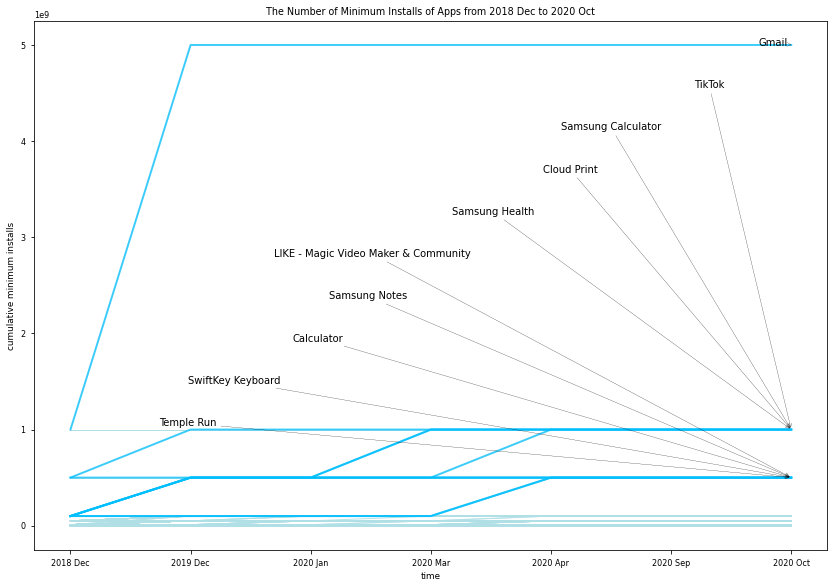

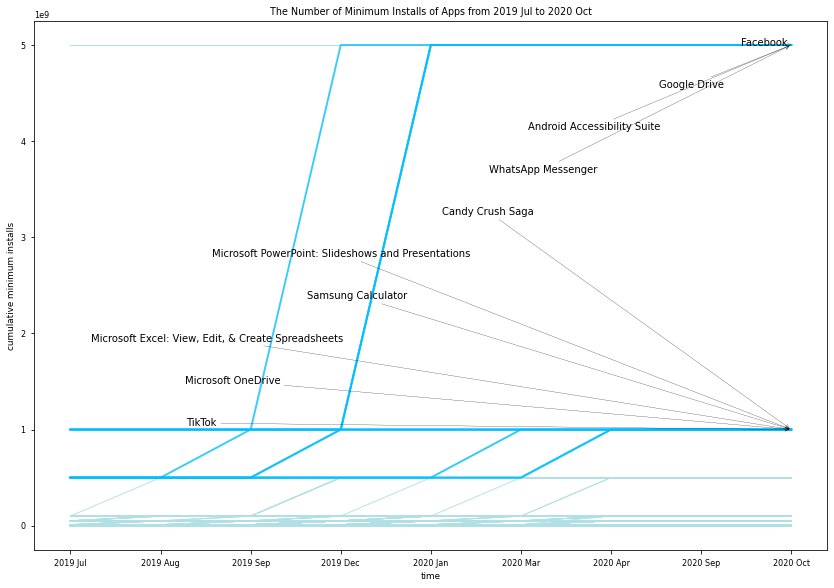

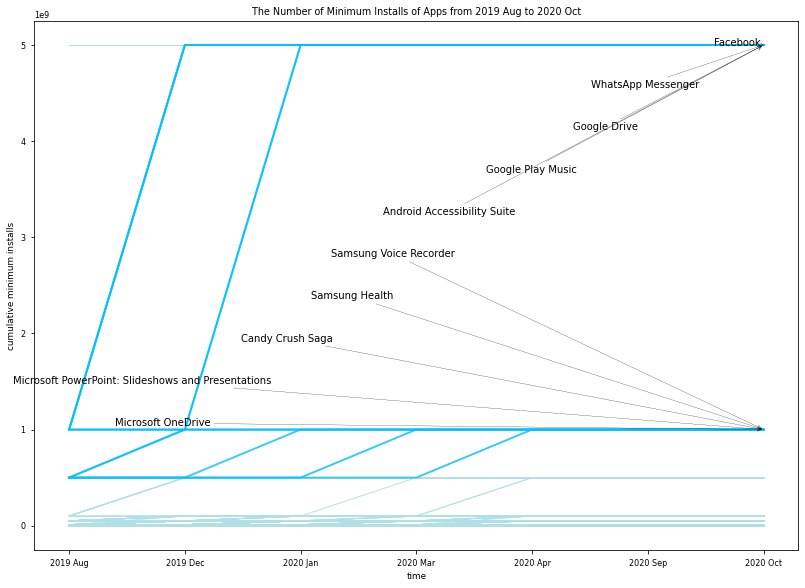

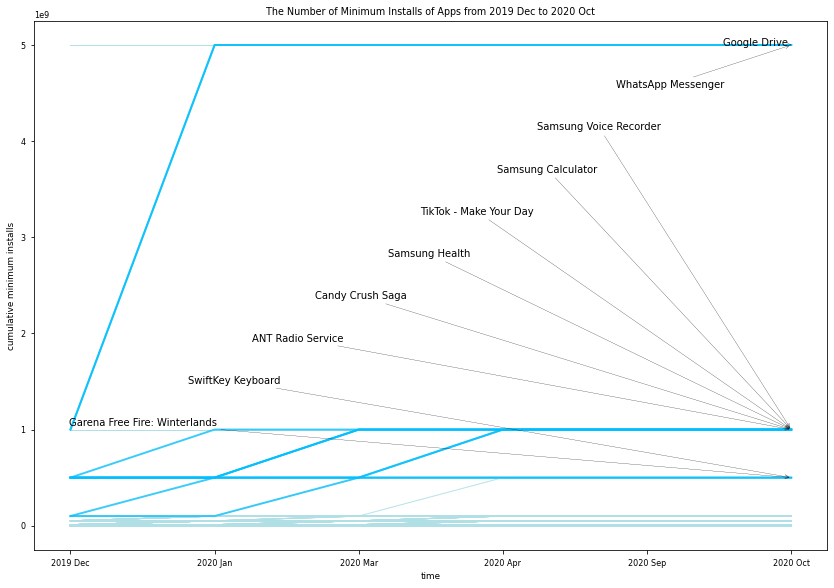

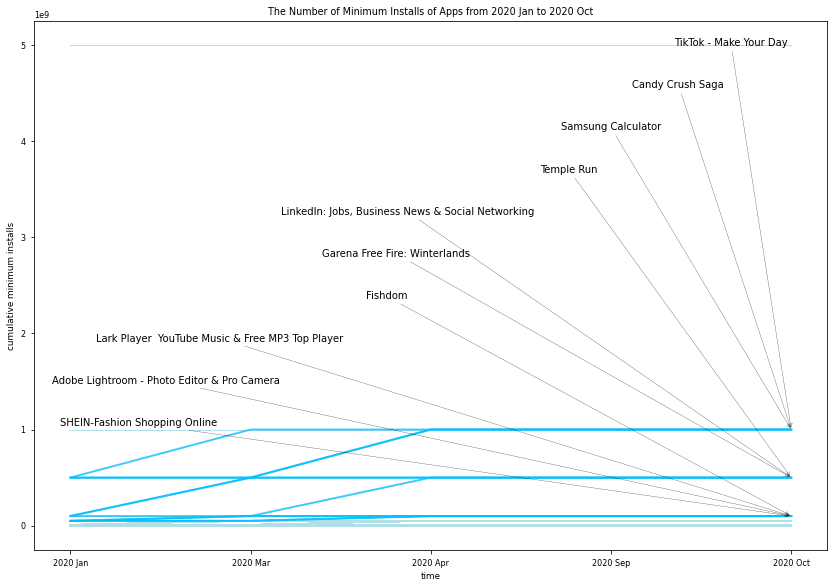

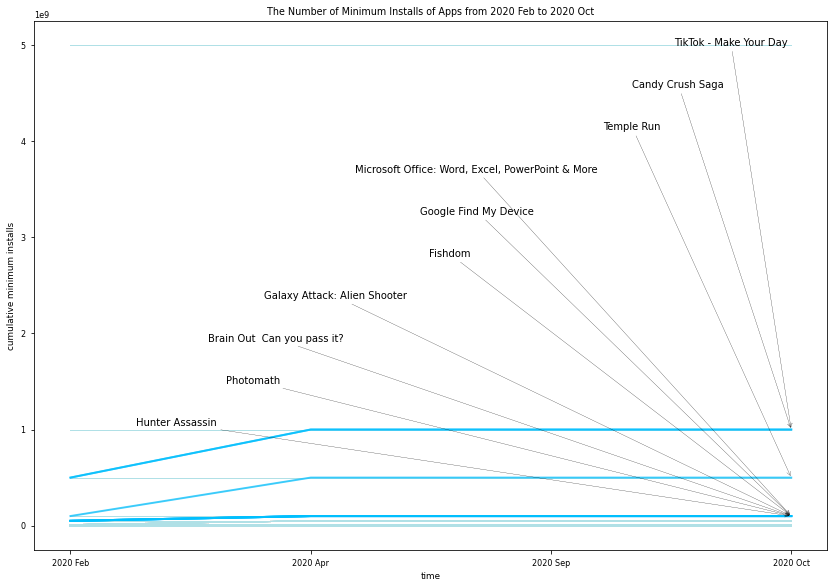

In [7]:
# CELL 6: MinInstalls for all the panels (complete sample)
%run -i '2_functions_data_visualization.py'
panels_track = {
'201812':['201912', '202001', '202003', '202004', '202009', '202010'],
'201907':['201908', '201909', '201912', '202001', '202003', '202004', '202009', '202010'],
'201908':['201912', '202001', '202003', '202004', '202009', '202010'],
'201912':['202001', '202003', '202004', '202009', '202010'],
'202001':['202003', '202004', '202009', '202010'],
'202002':['202004', '202009', '202010']}
for initial_date, panels in panels_track.items():
    C, top_performers = dataframe_for_line_plot(initial_date = initial_date,
                                                      panels = panels,
                                                      variable = 'minInstalls')
    graph_line_plots(C,
                     initial_date = initial_date,
                     panels = panels,
                     variable ='minInstalls',
                     top_performers = top_performers)


In [11]:
# CELL 7.1: SUBSET DATAFRAME (CREATE NEW DICTIONARY AND SAVE)
# DIVIDE AND SAVE DATAFRAMES ACCORDING TO DIFFERENT MIN-INSTALLS (BOTH IN LEVEL AND CHANGE)
# THE QUANTILE DISTRIBUTION HAS BEEN CHECKED AND SAVED AS TABLE USING FUNCTION export_and_save_qauntile_tables
%run -i '3_tables.py'
initial_end_dates = {
'201812':'202010',
'201907':'202010',
'201908':'202010',
'201912':'202010',
'202001':'202010',
'202002':'202010'}
variable = 'minInstalls'
for initial_date, end_date in initial_end_dates.items():
    # divide and save according to the snapshot of variable level at the end date
    DF_dict = divide_dataframe_by_variable_level(initial_date = initial_date,
                                      the_panel = end_date,
                                      variable = variable,
                                      in_place = False)

    # divide and save according to the change in the variable between the initial and end date
    DF_dict = divide_dataframe_by_variable_change(initial_date = initial_date,
                                                  end_date = end_date,
                                                  variable = variable,
                                                  in_place = False)


201812 panel divided according to static minInstalls in 202010
below 500000 (2838, 369)

between 500000 and 5000000 (1094, 369)

above 5000000 (783, 369)

0.1         0.0
0.2         0.0
0.3         0.0
0.4         0.0
0.5         0.0
0.6         0.0
0.7       400.0
0.8     40000.0
0.9    500000.0
Name: change_in_minInstalls, dtype: float64
201812 panel divided according to change in minInstalls between the initial date and 202010
no change (3094, 369)

increase more than 0 (1620, 369)

201907 panel divided according to static minInstalls in 202010
below 500000 (4261, 461)

between 500000 and 5000000 (2058, 461)

above 5000000 (1555, 461)

0.1         0.0
0.2         0.0
0.3         0.0
0.4         0.0
0.5         0.0
0.6         0.0
0.7         0.0
0.8     50000.0
0.9    900000.0
Name: change_in_minInstalls, dtype: float64
201907 panel divided according to change in minInstalls between the initial date and 202010
no change (5606, 461)

increase more than 0 (2268, 461)

201908 panel di

In [28]:
# CELL 7.2: SUBSET DATAFRAME (IN-PLACE AND SAVE)
# DIVIDE AND SAVE DATAFRAMES ACCORDING TO DIFFERENT MIN-INSTALLS (BOTH IN LEVEL AND CHANGE)
# THE QUANTILE DISTRIBUTION HAS BEEN CHECKED AND SAVED AS TABLE USING FUNCTION export_and_save_qauntile_tables
%run -i '3_tables.py'
initial_end_dates = {
'201812':'202010',
'201907':'202010',
'201908':'202010',
'201912':'202010',
'202001':'202010',
'202002':'202010'}
variable = 'minInstalls'
for initial_date, end_date in initial_end_dates.items():
    # divide and save according to the snapshot of variable level at the end date
    DF = divide_dataframe_by_variable_level(initial_date = initial_date,
                                      the_panel = end_date,
                                      variable = variable,
                                      in_place = True)
    # divide and save according to the change in the variable between the initial and end date
    DF = divide_dataframe_by_variable_change(initial_date = initial_date,
                                              end_date = end_date,
                                              variable = variable,
                                              in_place = True)



201812
below 500000                  2838
between 500000 and 5000000    1094
above 5000000                  783
Name: group_static_minInstalls, dtype: int64
0.1         0.0
0.2         0.0
0.3         0.0
0.4         0.0
0.5         0.0
0.6         0.0
0.7       400.0
0.8     40000.0
0.9    500000.0
Name: change_in_minInstalls, dtype: float64
201812
no change               3094
increase more than 0    1620
Name: group_change_minInstalls, dtype: int64
201907
below 500000                  4261
between 500000 and 5000000    2058
above 5000000                 1555
Name: group_static_minInstalls, dtype: int64
0.1         0.0
0.2         0.0
0.3         0.0
0.4         0.0
0.5         0.0
0.6         0.0
0.7         0.0
0.8     50000.0
0.9    900000.0
Name: change_in_minInstalls, dtype: float64
201907
no change               5606
increase more than 0    2268
Name: group_change_minInstalls, dtype: int64
201908
below 500000                  6862
between 500000 and 5000000    3025
above 5000000

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


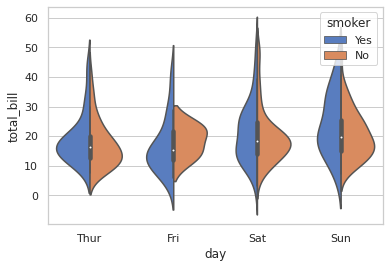

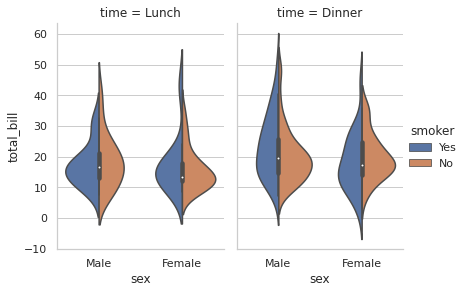

In [4]:
# TEST CELL for seaborn internal dataset
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
                    data=tips, palette="muted", split=True)

g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="violin", split=True,
                height=4, aspect=.7);
pd.options.display.max_columns = None
display(tips)

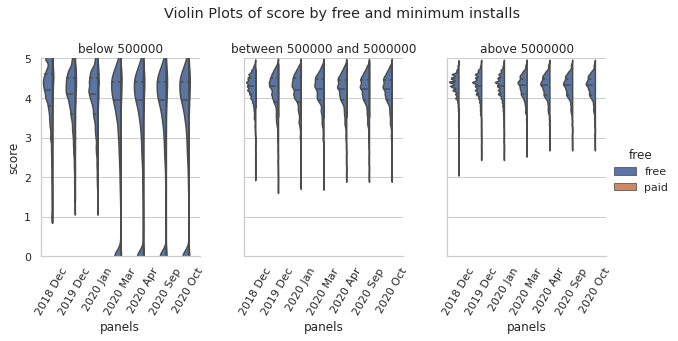

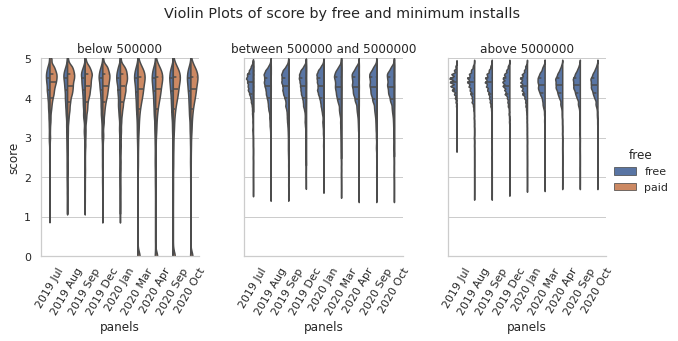

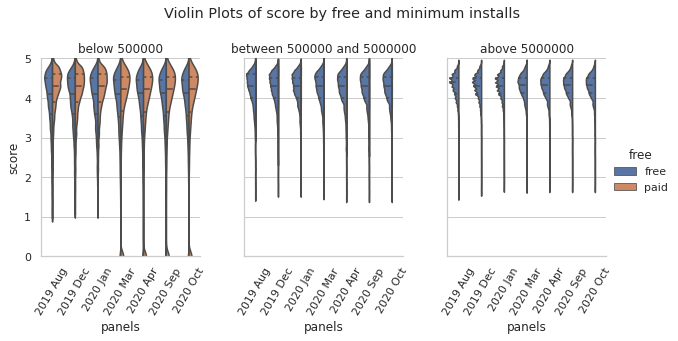

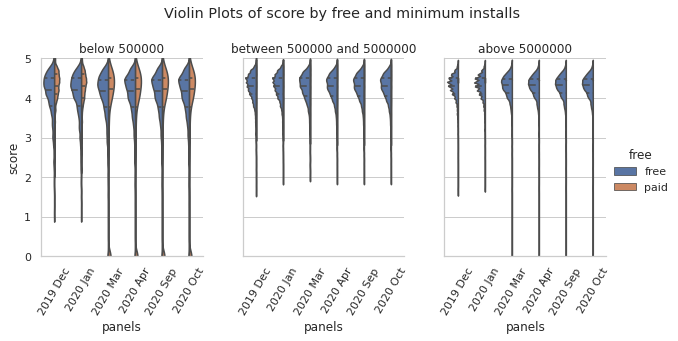

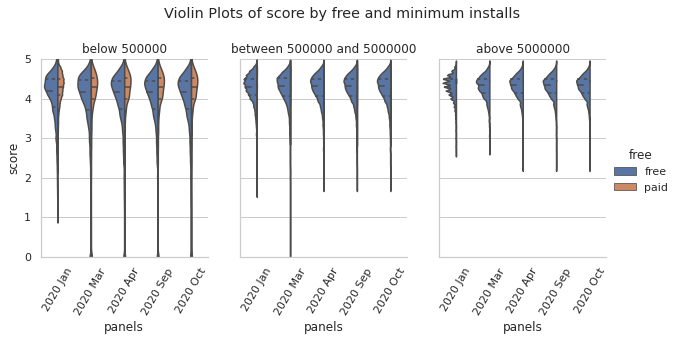

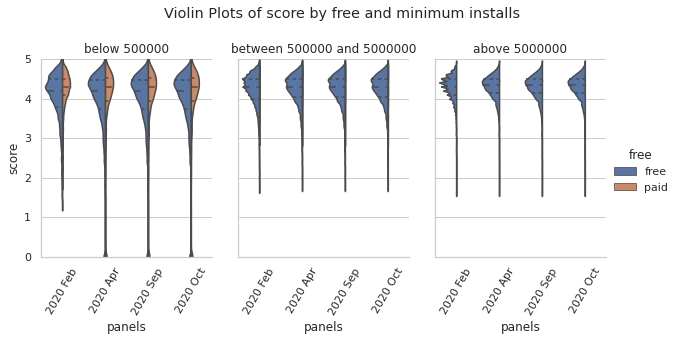

In [20]:
# CELL 8.1: GRAPH SCORE BY FREE AND LEVEL MIN-INSTALLS
%run -i '2_functions_data_visualization.py'
panels_track = {
'201812':['201912', '202001', '202003', '202004', '202009', '202010'],
'201907':['201908', '201909', '201912', '202001', '202003', '202004', '202009', '202010'],
'201908':['201912', '202001', '202003', '202004', '202009', '202010'],
'201912':['202001', '202003', '202004', '202009', '202010'],
'202001':['202003', '202004', '202009', '202010'],
'202002':['202004', '202009', '202010']}
for initial_date, panels in panels_track.items():
    E = dataframe_for_violin_plots(initial_date = initial_date,
                                   panels = panels,
                                   variable = 'score',
                                   group = 'subset_df_according_to_level_minInstalls_202010',
                                   binary = 'free_True',
                                   panel_for_group_and_binary = '202010')

    graph_violin_plots(dataframe = E,
                         x_axis_group = 'panels',
                         y_axis_var = 'score',
                         split_binary = 'free',
                         subplot_var = 'subset_df_according_to_level_minInstalls')

<Figure size 432x288 with 0 Axes>

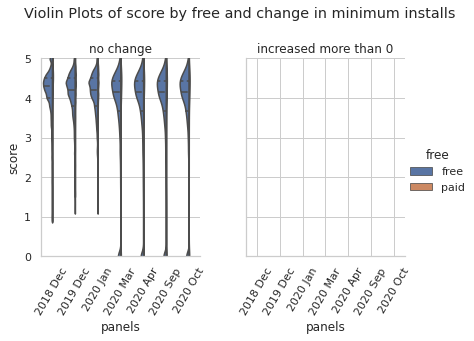

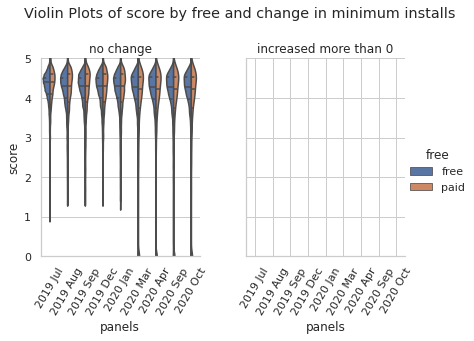

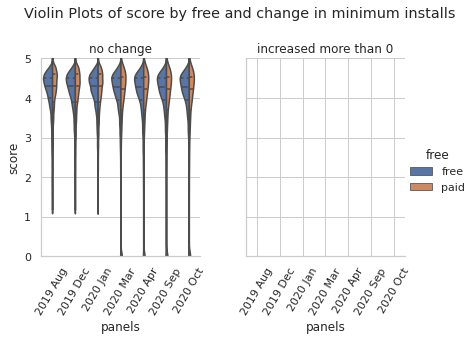

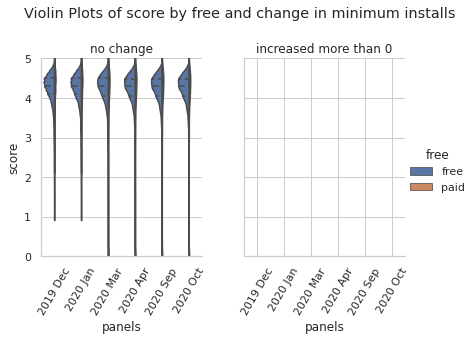

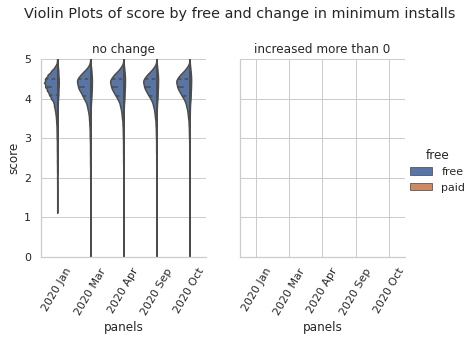

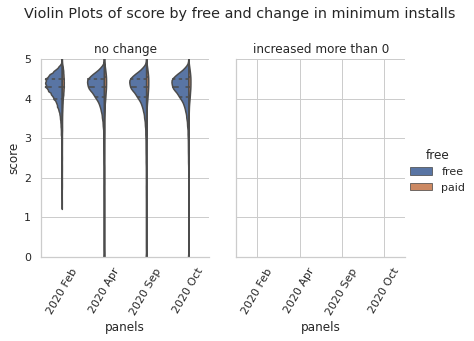

In [21]:
# CELL 8.2: GRAPH SCORE BY FREE AND CHANGE MIN-INSTALLS
# it seems that change in min installs is not suitable for violin plots because the
# number of apps actually have increase in minInstalls are too much fewer than apps with no change in minInstalls
# %run -i '2_functions_data_visualization.py'
# panels_track = {
# '201812':['201912', '202001', '202003', '202004', '202009', '202010'],
# '201907':['201908', '201909', '201912', '202001', '202003', '202004', '202009', '202010'],
# '201908':['201912', '202001', '202003', '202004', '202009', '202010'],
# '201912':['202001', '202003', '202004', '202009', '202010'],
# '202001':['202003', '202004', '202009', '202010'],
# '202002':['202004', '202009', '202010']}
# for initial_date, panels in panels_track.items():
#     E = dataframe_for_violin_plots(initial_date = initial_date,
#                                    panels = panels,
#                                    variable = 'score',
#                                    group = 'subset_df_according_to_change_in_minInstalls_between_' + initial_date + '_and_202010',
#                                    binary = 'free_True',
#                                    panel_for_group_and_binary = '202010')
#
#     graph_violin_plots(dataframe = E,
#                          x_axis_group = 'panels',
#                          y_axis_var = 'score',
#                          split_binary = 'free',
#                          subplot_var = 'subset_df_according_to_change_in_minInstalls_between_' + initial_date + '_and')

In [32]:
# CELL 9.1: descriptive stats by groups (TABLES)
%run -i '3_tables.py'
initial_end_dates = {
'201812':'202010',
'201907':'202010',
'201908':'202010',
'201912':'202010',
'202001':'202010',
'202002':'202010'}
for initial_date, the_panel in initial_end_dates.items():
    K = descriptive_stats_merged_df(
        level_1_var = 'group_static_minInstalls',
        initial_date = initial_date,
        the_panel = the_panel,
        level_2_vars = 'GAME',
        level_3_vars = 'free_True',
        aggregate_var_1 = 'score',
        aggregate_var_2 = 'ratings',
        aggregate_var_3 = 'reviews',
        aggregate_var_4 = 'minInstalls',
        aggregate_var_5 = 'price'
        )

#print(K)

                                                          appId_201812  \
com.imgur.mobile                                      com.imgur.mobile   
com.adsk.sketchbook                                com.adsk.sketchbook   
com.fungamesforfree.colorfy                com.fungamesforfree.colorfy   
com.amitech.allevents                            com.amitech.allevents   
com.ticketmaster.mobile.android.na  com.ticketmaster.mobile.android.na   

                                       genreId_201812 contentRating_201812  \
com.imgur.mobile                    ['VIDEO_PLAYERS']             ['Teen']   
com.adsk.sketchbook                 ['ENTERTAINMENT']         ['Everyone']   
com.fungamesforfree.colorfy         ['ENTERTAINMENT']         ['Everyone']   
com.amitech.allevents                      ['EVENTS']         ['Everyone']   
com.ticketmaster.mobile.android.na         ['EVENTS']         ['Everyone']   

                                        version_201812  \
com.imgur.mobile            

In [25]:
K.head()

,group_static_minInstalls,GAME_202010,free_True_202010,count,score_min,score_mean,score_median,score_max,reviews_min,reviews_mean,reviews_median,reviews_max
0,above 5000000,0,1,1056,1.691305,4.305117,4.385196,4.903604,2247.0,4.586296e+05,103065.5,31713989.0
1,above 5000000,1,0,1,4.462158,4.462158,4.462158,4.462158,1635880.0,1.635880e+06,1635880.0,1635880.0
2,above 5000000,1,1,997,3.036054,4.263465,4.281652,4.833697,22.0,3.597798e+05,128902.0,20747541.0
3,below 500000,0,0,2479,0.000000,3.654228,4.161616,5.000000,0.0,9.473768e+02,89.0,50150.0
4,below 500000,0,1,2474,0.000000,3.815151,4.066791,5.000000,0.0,1.258915e+03,511.5,30189.0


In [ ]:
# https://pypi.org/project/tabulate/
# this is a latex cell
print(tabulate(table, headers, tablefmt="latex"))